In [71]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [72]:
data = pd.read_csv('../Data/Clean-data/clean.csv',parse_dates=['Date'])
data.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   Temperature   421570 non-null  float64       
 5   Fuel_Price    421570 non-null  float64       
 6   MarkDown1     421570 non-null  float64       
 7   MarkDown2     421570 non-null  float64       
 8   MarkDown3     421570 non-null  float64       
 9   MarkDown4     421570 non-null  float64       
 10  MarkDown5     421570 non-null  float64       
 11  CPI           421570 non-null  float64       
 12  Unemployment  421570 non-null  float64       
 13  IsHoliday     421570 non-null  bool          
 14  Type          421570 non-null  object        
 15  Size          421

In [74]:
data['Store'].value_counts()

Store
13    10474
10    10315
4     10272
1     10244
2     10238
24    10228
27    10225
34    10224
20    10214
6     10211
32    10202
19    10148
31    10142
28    10113
41    10088
11    10062
23    10050
14    10040
40    10017
15     9901
8      9895
39     9878
17     9864
18     9859
26     9854
25     9804
7      9762
12     9705
22     9688
45     9637
21     9582
35     9528
29     9455
16     9443
3      9036
5      8999
9      8867
38     7362
37     7206
44     7169
30     7156
42     6953
43     6751
33     6487
36     6222
Name: count, dtype: int64

In [75]:
data['Dept'].value_counts()

Dept
1     6435
16    6435
92    6435
38    6435
40    6435
      ... 
78     235
77     150
65     143
39      16
43      12
Name: count, Length: 81, dtype: int64

In [76]:
store_dept_sales = pd.pivot_table(data, index='Store', columns='Dept',
                                  values='Weekly_Sales', aggfunc=np.mean)
display(store_dept_sales)

Dept,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,...,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,...,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,...,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,...,89248.965524,66535.407203,159365.107902,67815.163007,68159.106573,147236.473706,38346.573077,39339.238951,15009.249371,623.182381
5,9774.553077,12317.953287,4101.085175,9860.806783,6699.202238,1191.057622,6124.484336,13735.709441,7919.805944,9783.395385,...,3059.520000,1457.221678,7759.205594,NaN,411.431486,19340.693986,5985.671119,667.070315,29.976087,NaN
6,23867.553776,50269.437273,16806.638811,34187.366503,34465.307622,7225.566643,34526.870420,47577.719790,48271.060140,47436.477902,...,53715.366084,45270.405175,99024.796503,41359.651189,41701.693497,89208.786294,30450.542238,20637.667063,9728.100629,388.636750
7,9542.801259,22603.690769,8633.536923,14950.518601,13860.350490,6329.928811,10925.757063,13970.619371,29722.736084,21136.560280,...,13858.405874,10263.880000,26530.890559,1328.178252,699.332522,34208.097273,1123.383217,4374.927902,260.886596,15.000000
8,14789.827343,35729.821748,10683.305105,21089.309301,19838.849231,3395.425455,20268.743776,26438.524336,11792.661678,20666.433776,...,39333.566154,31530.560909,60465.630000,27515.635315,25442.578042,62951.463706,16.986667,16978.366503,6880.466434,298.153714
9,11846.558252,24969.477413,7497.356783,17165.947762,19282.746014,2806.416364,13826.694336,21424.470699,13196.569720,12810.480350,...,2981.249510,869.273287,14123.063147,21.240000,599.112568,29575.050769,3596.107762,372.655556,27.930000,NaN


we can see that there are negative values and zeros
these values are wrong and needs to be dropped if they hold a small percentage of the the whole data set
which in ths case are 0.3%

In [77]:
data.loc[data['Weekly_Sales']<=0]

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
188,1,47,2010-02-19,-863.00,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False,A,151315
406,1,47,2010-03-12,-698.00,57.79,2.667,0.00,0.00,0.00,0.00,0.00,211.380643,8.106,False,A,151315
2549,1,47,2010-10-08,-58.00,63.93,2.633,0.00,0.00,0.00,0.00,0.00,211.746754,7.838,False,A,151315
3632,1,54,2011-01-21,-50.00,44.04,3.016,0.00,0.00,0.00,0.00,0.00,211.827234,7.742,False,A,151315
4132,1,47,2011-03-11,0.00,53.56,3.459,0.00,0.00,0.00,0.00,0.00,214.111056,7.742,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420066,45,49,2012-05-25,-4.97,67.21,3.798,5370.39,0.00,361.22,1287.62,2461.81,191.002810,8.567,False,B,118221
420403,45,49,2012-06-29,-34.00,75.22,3.506,3291.36,425.60,0.00,314.88,2255.34,191.099246,8.567,False,B,118221
420736,45,49,2012-08-03,-1.91,76.58,3.654,24853.05,39.56,17.96,11142.69,2768.32,191.164090,8.684,False,B,118221
421007,45,54,2012-08-31,0.00,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,191.461281,8.684,False,B,118221


In [78]:
data = data.loc[data['Weekly_Sales'] > 0]

In [79]:
data.shape

(420212, 16)

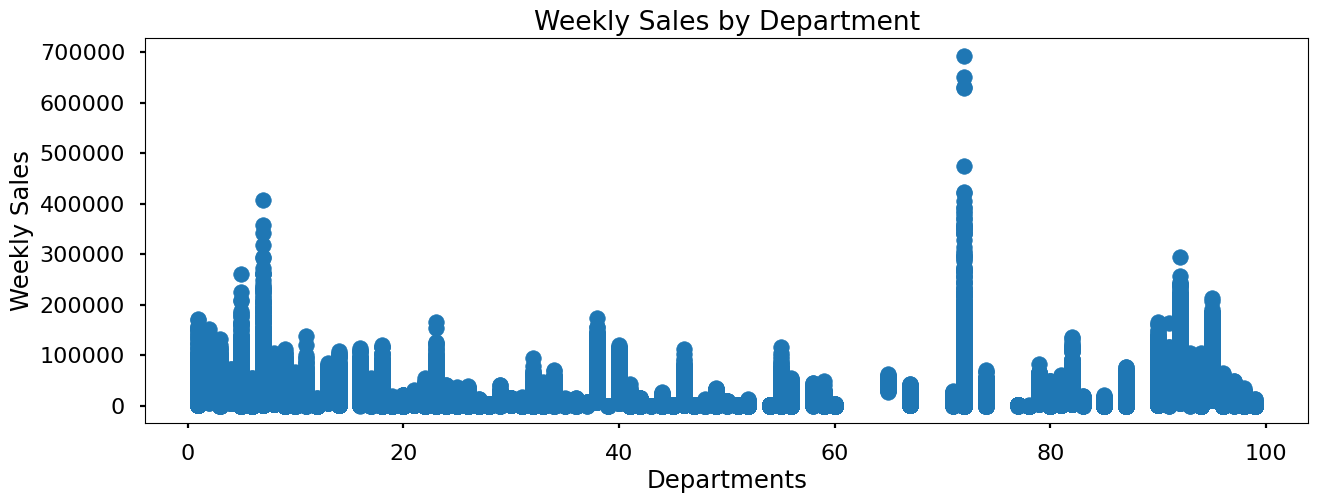

In [80]:
x = data['Dept']
y = data['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Department')
plt.xlabel('Departments')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

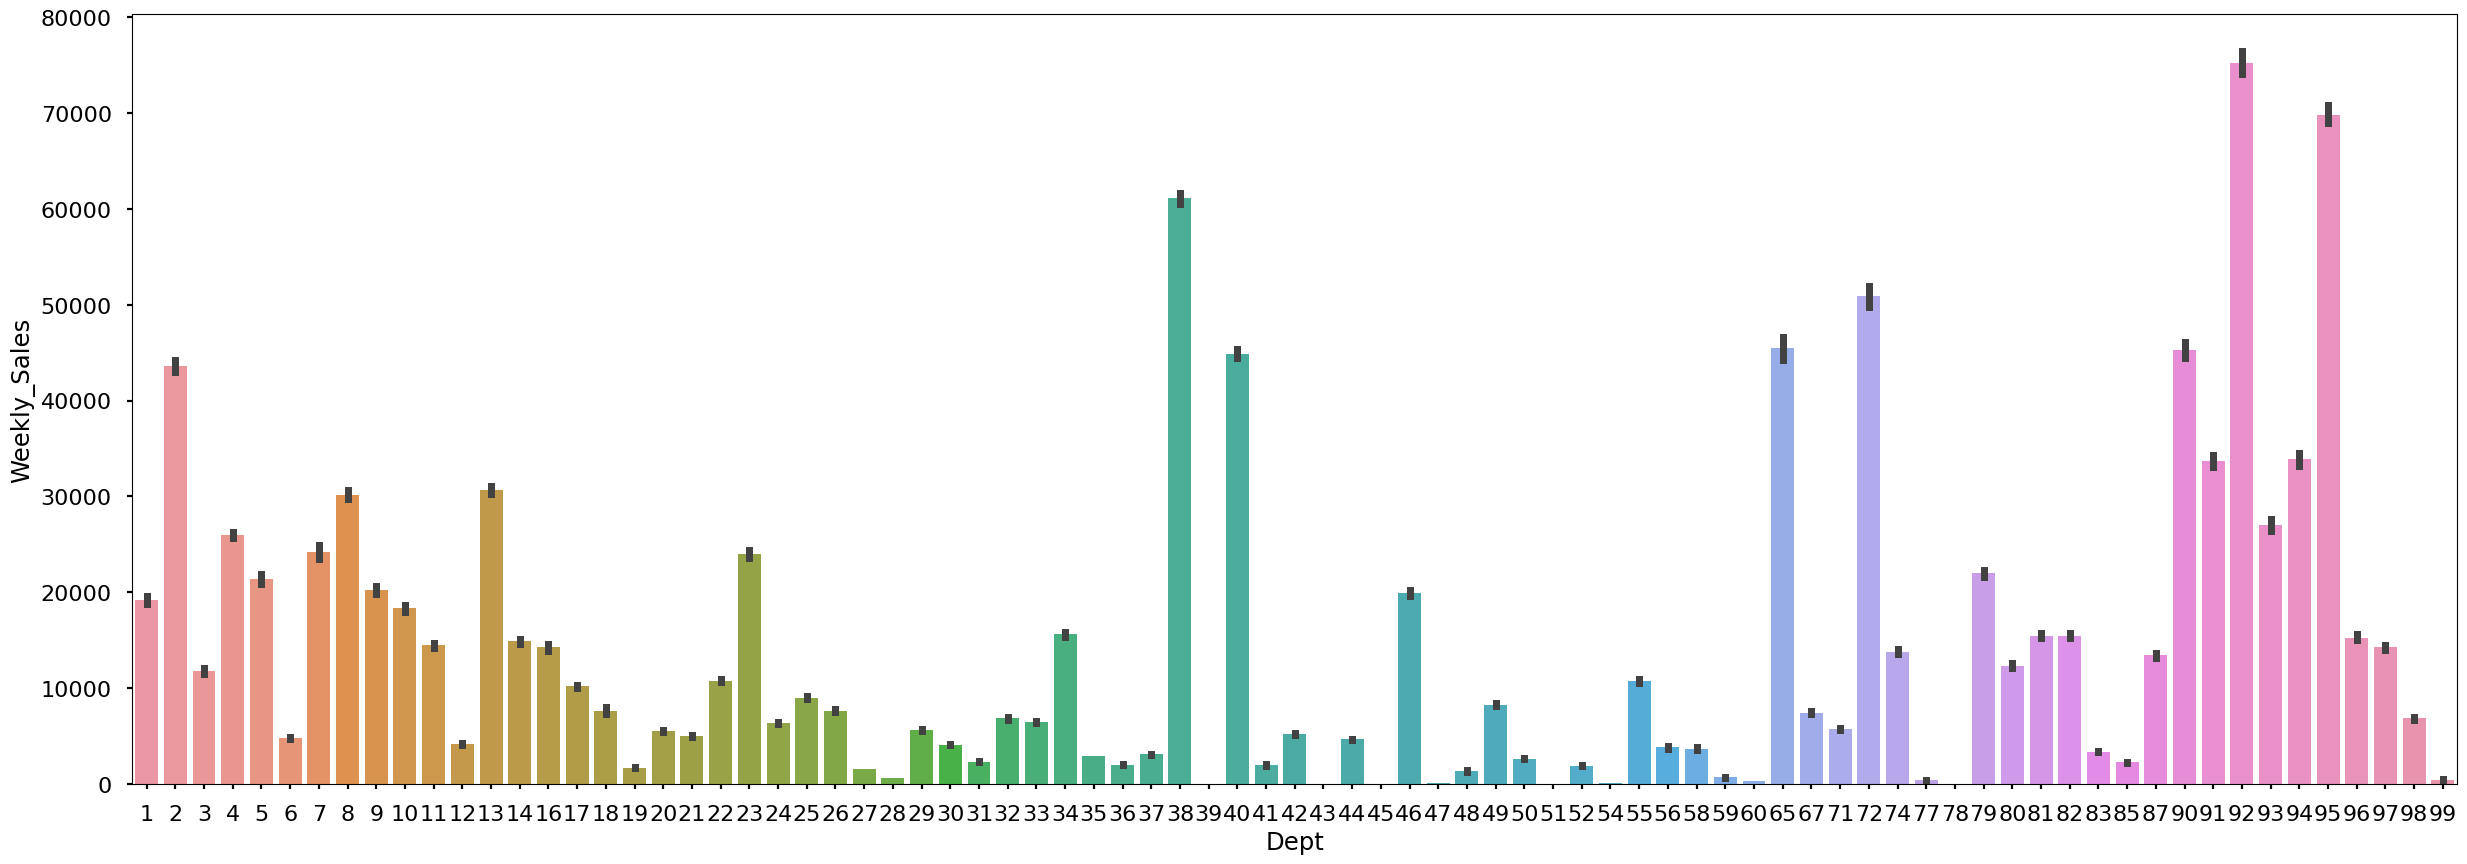

In [81]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=data)

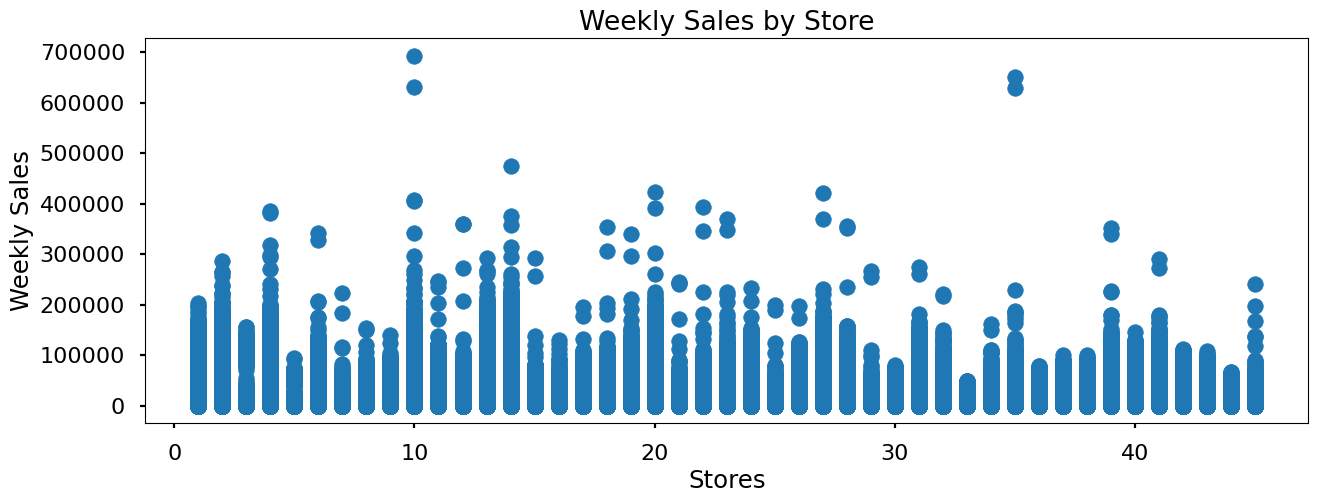

In [82]:
x = data['Store']
y = data['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Store')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

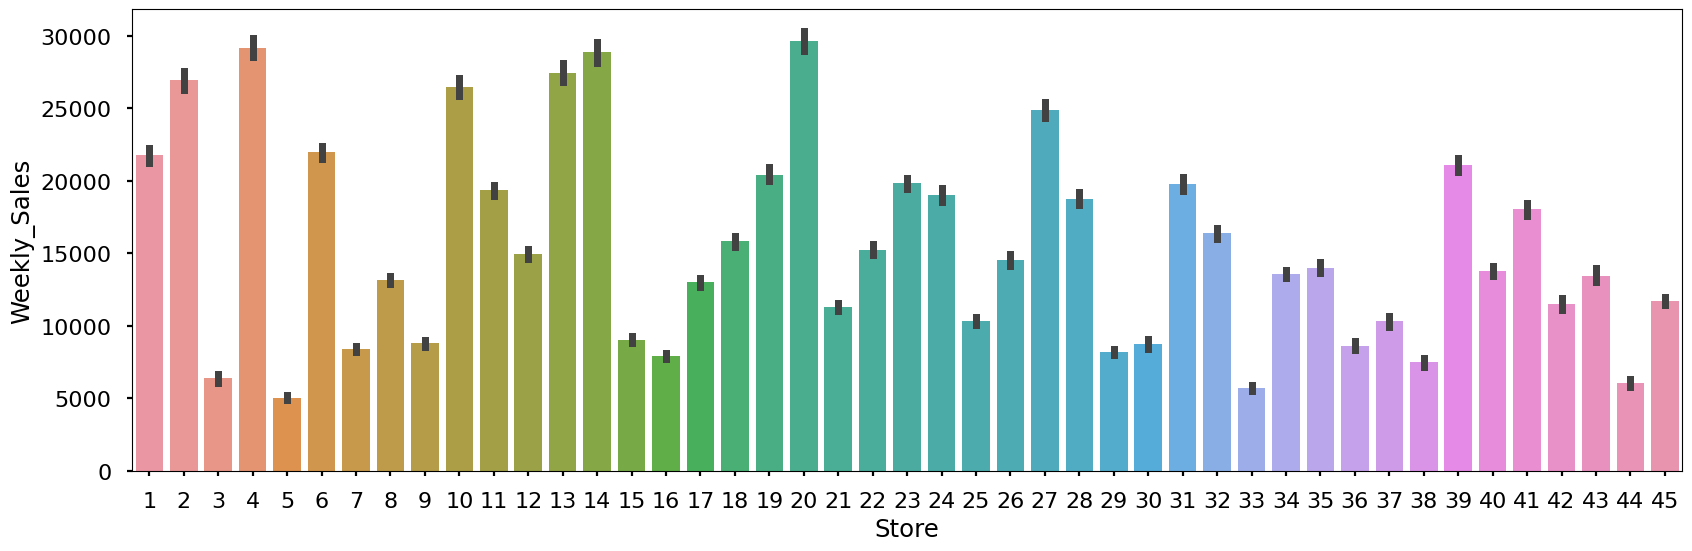

In [83]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=data)

<Axes: xlabel='Temperature'>

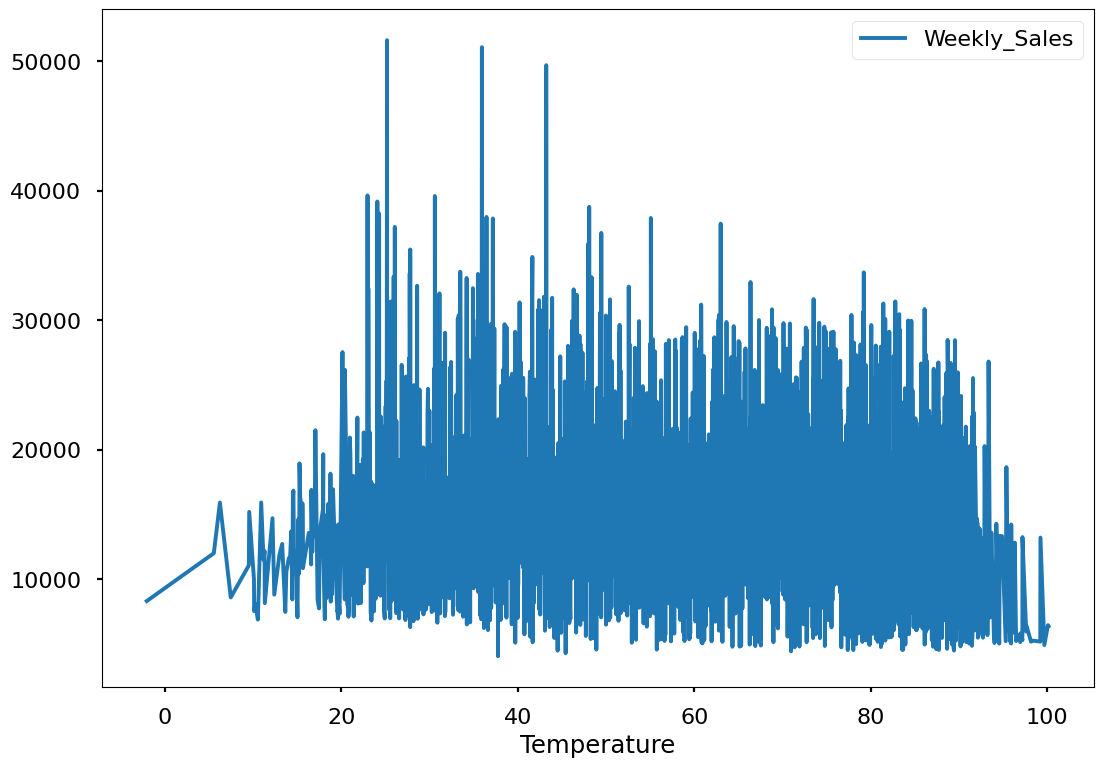

In [84]:
temp = pd.pivot_table(data, values = "Weekly_Sales", index= "Temperature")
temp.plot()

<Axes: xlabel='Fuel_Price'>

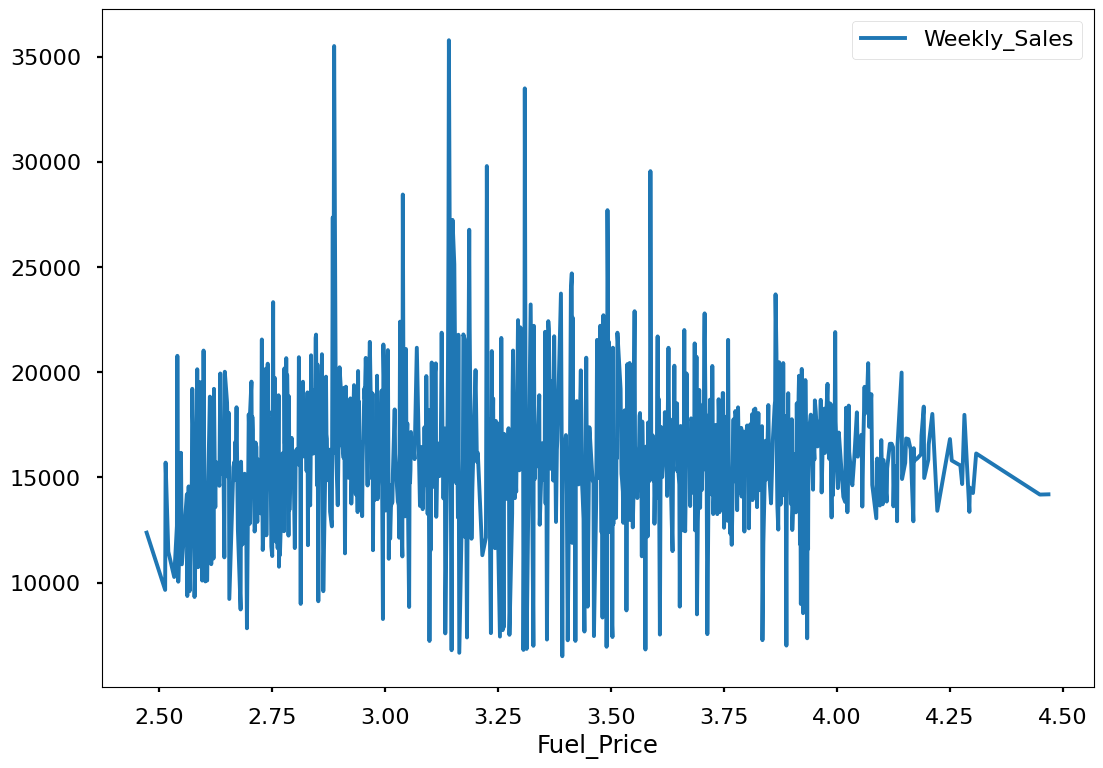

In [85]:
fuel_price = pd.pivot_table(data, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot()

<Axes: xlabel='CPI'>

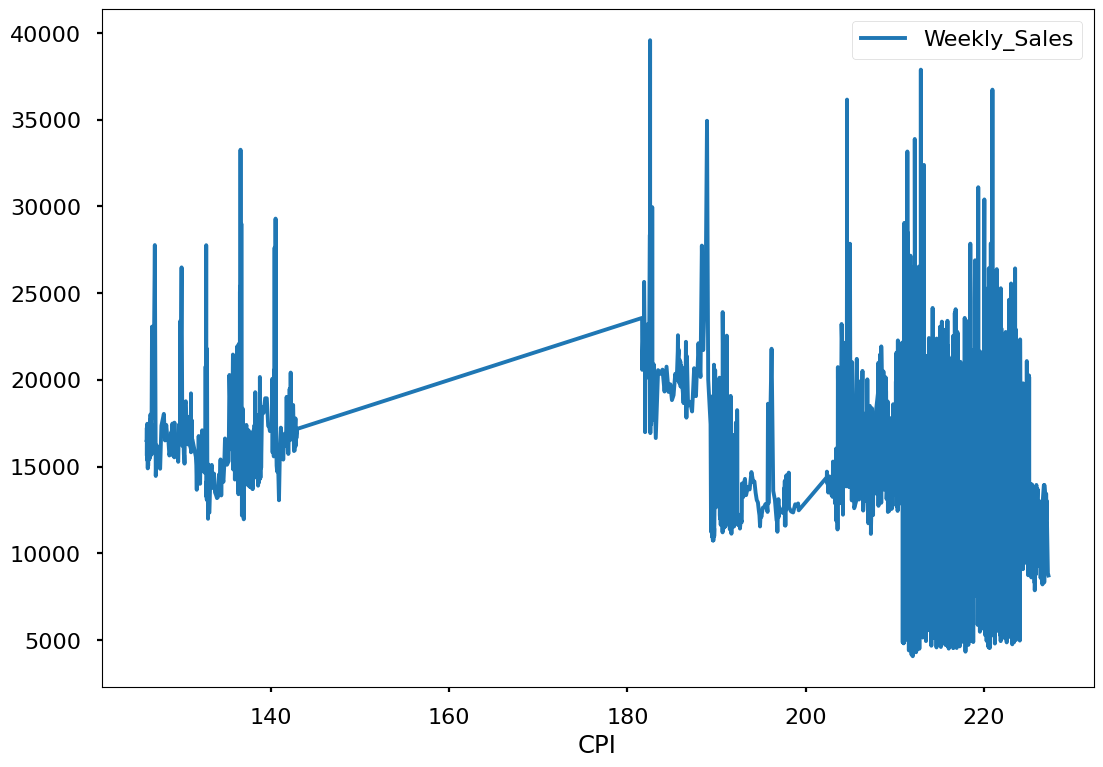

In [86]:
CPI = pd.pivot_table(data, values = "Weekly_Sales", index= "CPI")
CPI.plot()

<Axes: xlabel='Unemployment'>

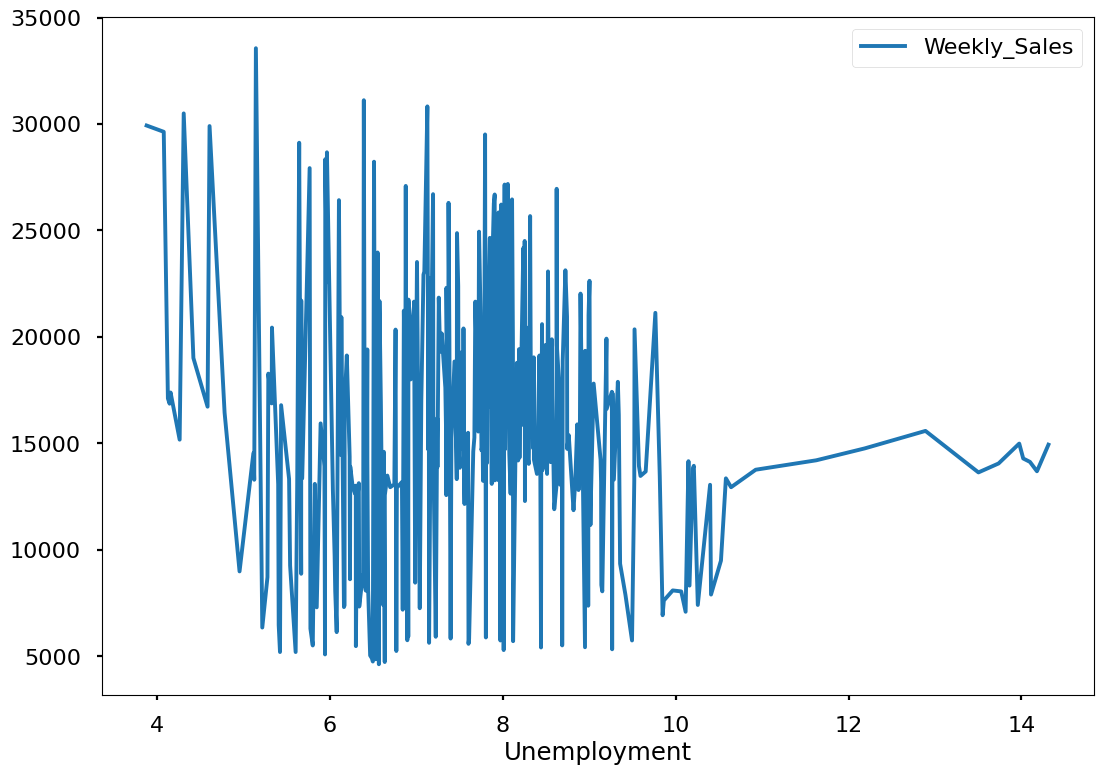

In [87]:
unemployment = pd.pivot_table(data, values = "Weekly_Sales", index= "Unemployment")
unemployment.plot()

In [88]:
data.groupby('Type').describe()['Size'].round(2) 

,count,mean,min,25%,50%,75%,max,std
Type,,,,,,,,
A,214961.0,182225.39,39690.0,158114.0,202505.0,203819.0,219622.0,41532.66
B,162787.0,101796.84,34875.0,93188.0,114533.0,123737.0,140167.0,30944.31
C,42464.0,40536.10,39690.0,39690.0,39910.0,41062.0,42988.0,1194.69


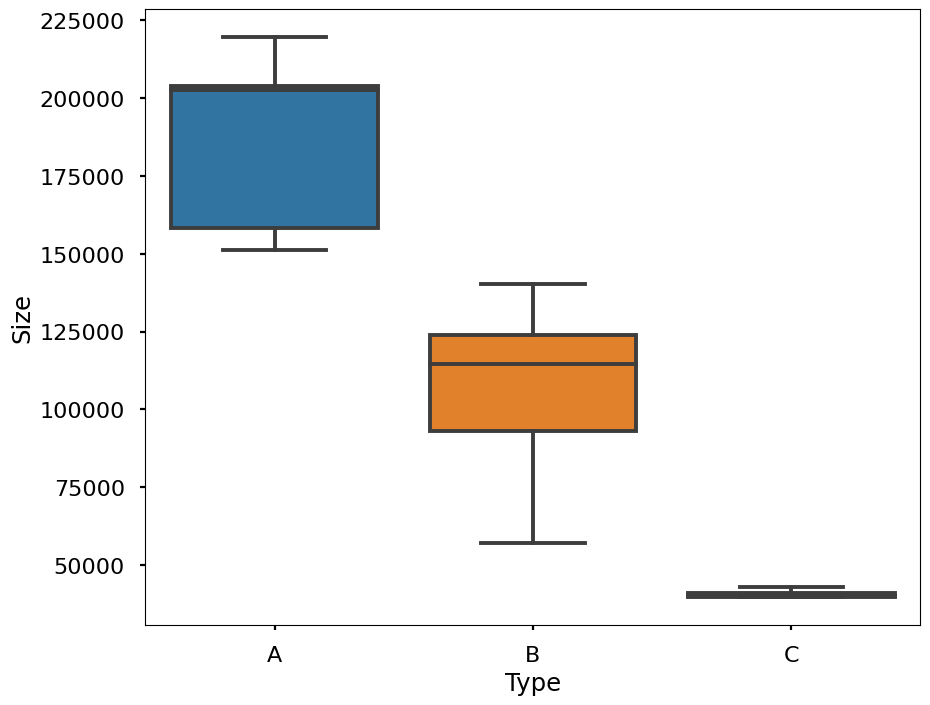

In [89]:
plt.figure(figsize=(10,8)) 
fig = sns.boxplot(x='Type', y='Size', data=data, showfliers=False)

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

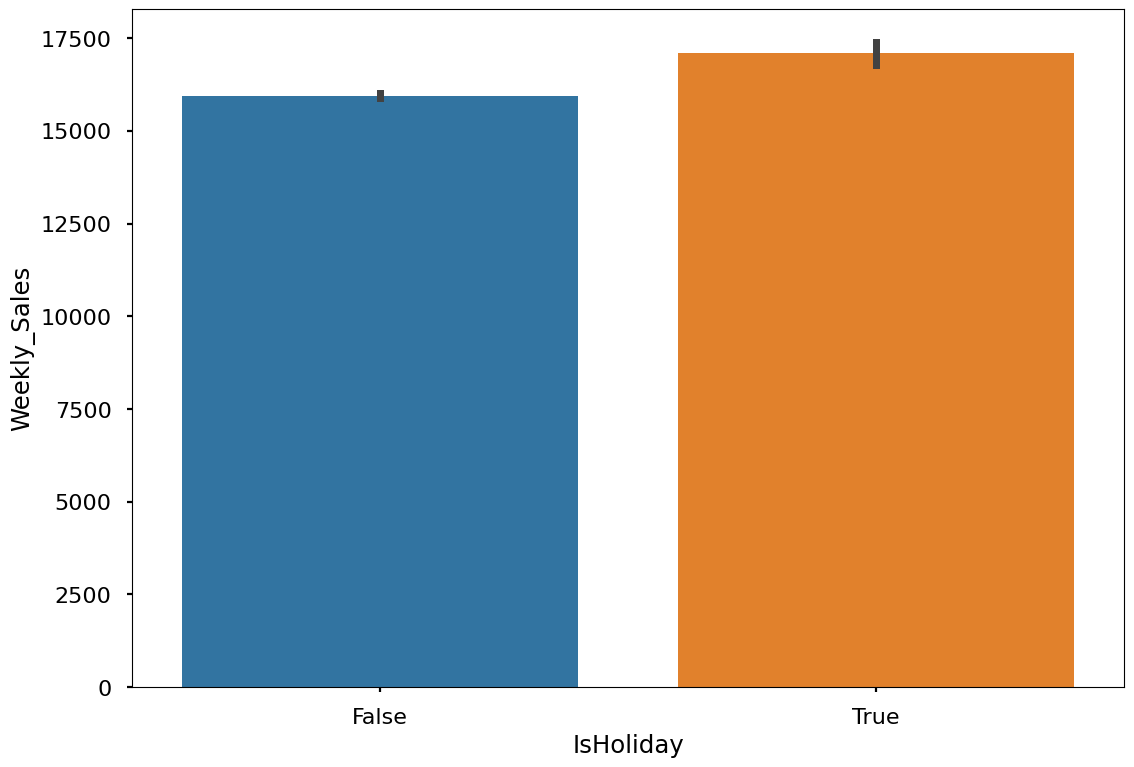

In [90]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=data)

In [91]:
holiday_dates = data.loc[data['IsHoliday']==True]
holiday_dates['Date'].nunique() 

10

In [92]:
holiday_dates = data.loc[data['IsHoliday']==True]
holiday_dates['Date'].unique() 

<DatetimeArray>
['2010-02-12 00:00:00', '2010-09-10 00:00:00', '2010-11-26 00:00:00',
 '2010-12-31 00:00:00', '2011-02-11 00:00:00', '2011-09-09 00:00:00',
 '2011-11-25 00:00:00', '2011-12-30 00:00:00', '2012-02-10 00:00:00',
 '2012-09-07 00:00:00']
Length: 10, dtype: datetime64[ns]

In [93]:
not_holiday = data.loc[data['IsHoliday']==False]
not_holiday['Date'].nunique() 

133

In [94]:
data.loc[(data['Date'] == '2010-02-12')|(data['Date'] == '2011-02-11')|(data['Date'] == '2012-02-10'),'Super_Bowl'] = True
data.loc[(data['Date'] != '2010-02-12')&(data['Date'] != '2011-02-11')&(data['Date'] != '2012-02-10'),'Super_Bowl'] = False

In [95]:
data.loc[(data['Date'] == '2010-09-10')|(data['Date'] == '2011-09-09')|(data['Date'] == '2012-09-07'),'Labor_Day'] = True
data.loc[(data['Date'] != '2010-09-10')&(data['Date'] != '2011-09-09')&(data['Date'] != '2012-09-07'),'Labor_Day'] = False

In [96]:
data.loc[(data['Date'] == '2010-11-26')|(data['Date'] == '2011-11-25'),'Thanksgiving'] = True
data.loc[(data['Date'] != '2010-11-26')&(data['Date'] != '2011-11-25'),'Thanksgiving'] = False

In [97]:
data.loc[(data['Date'] == '2010-12-31')|(data['Date'] == '2011-12-30'),'Christmas'] = True
data.loc[(data['Date'] != '2010-12-31')&(data['Date'] != '2011-12-30'),'Christmas'] = False

<Axes: xlabel='Christmas', ylabel='Weekly_Sales'>

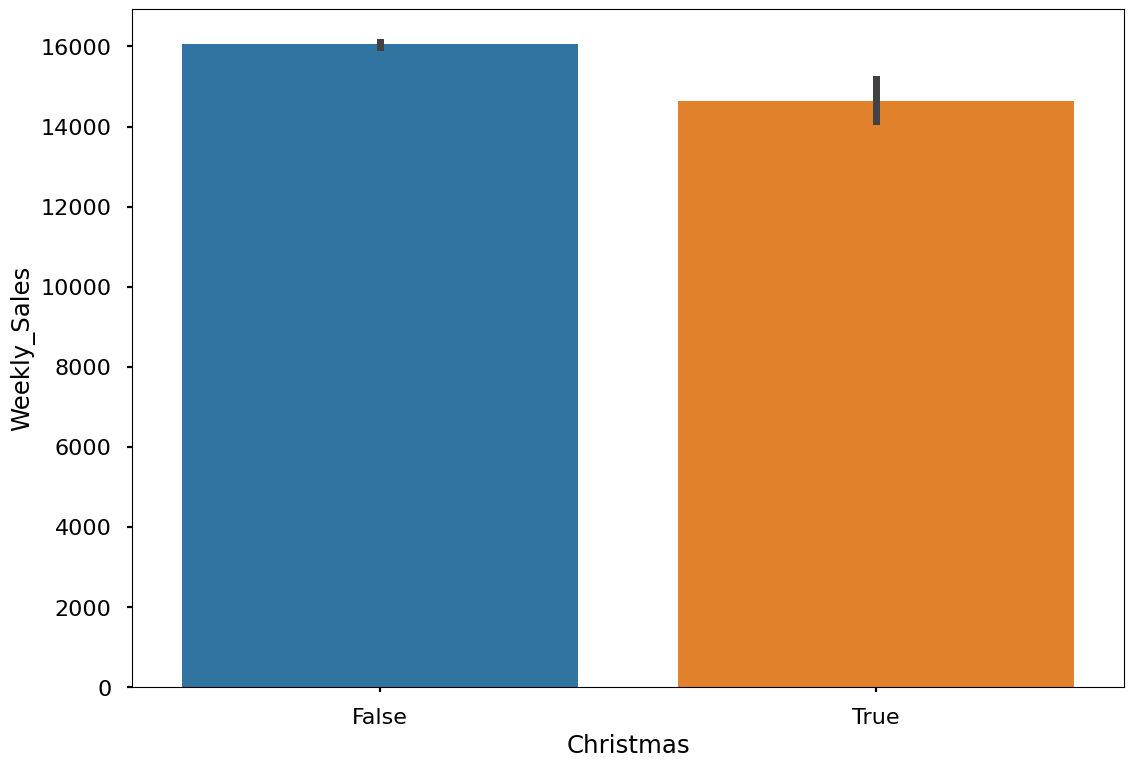

In [98]:
sns.barplot(x='Christmas', y='Weekly_Sales', data=data)

<Axes: xlabel='Thanksgiving', ylabel='Weekly_Sales'>

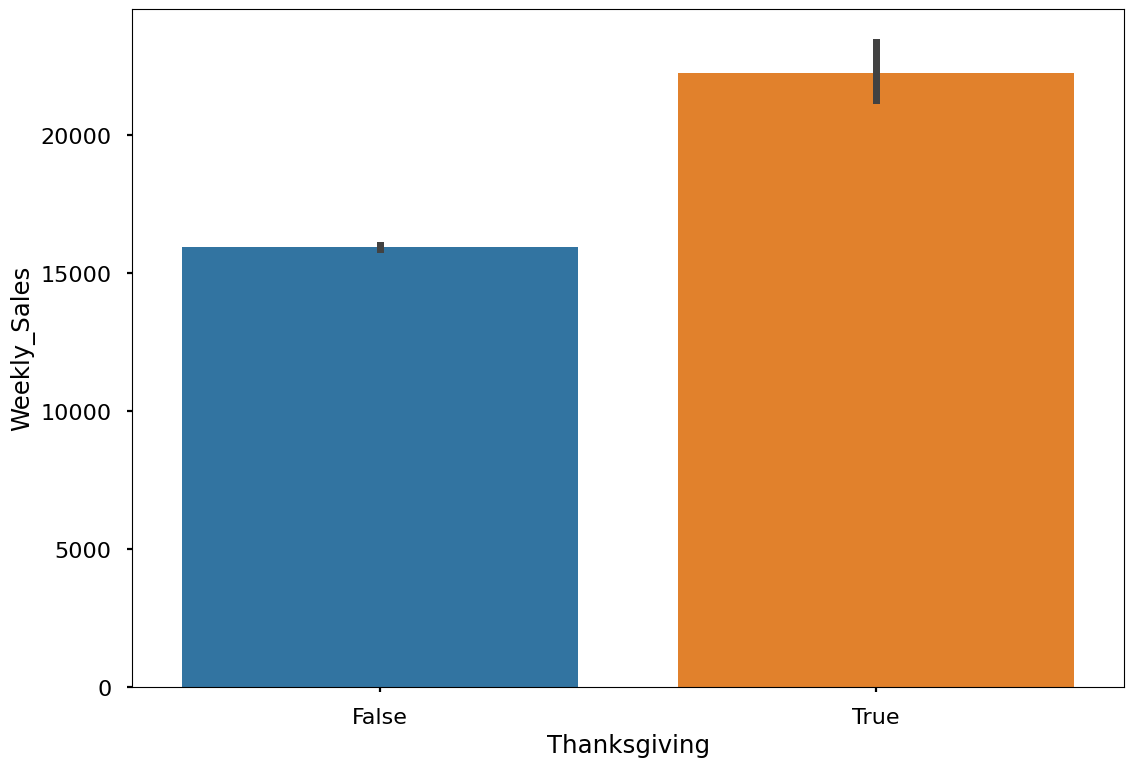

In [99]:
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=data)

<Axes: xlabel='Super_Bowl', ylabel='Weekly_Sales'>

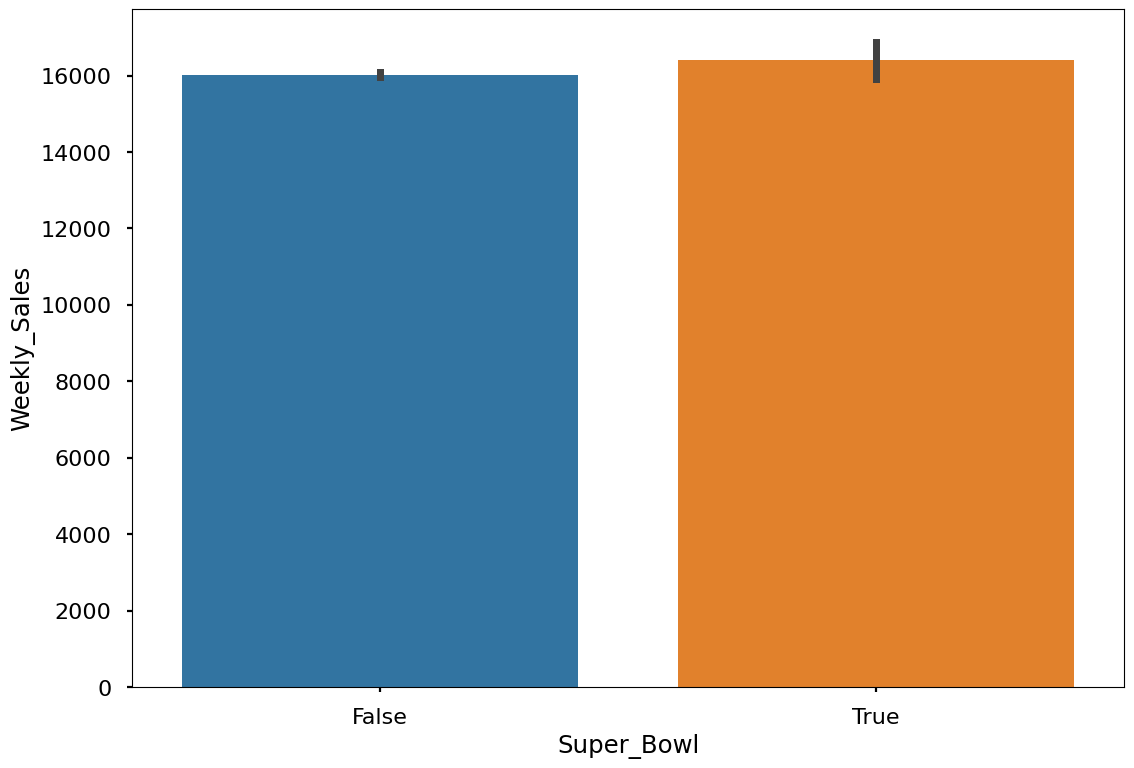

In [100]:
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=data)

<Axes: xlabel='Labor_Day', ylabel='Weekly_Sales'>

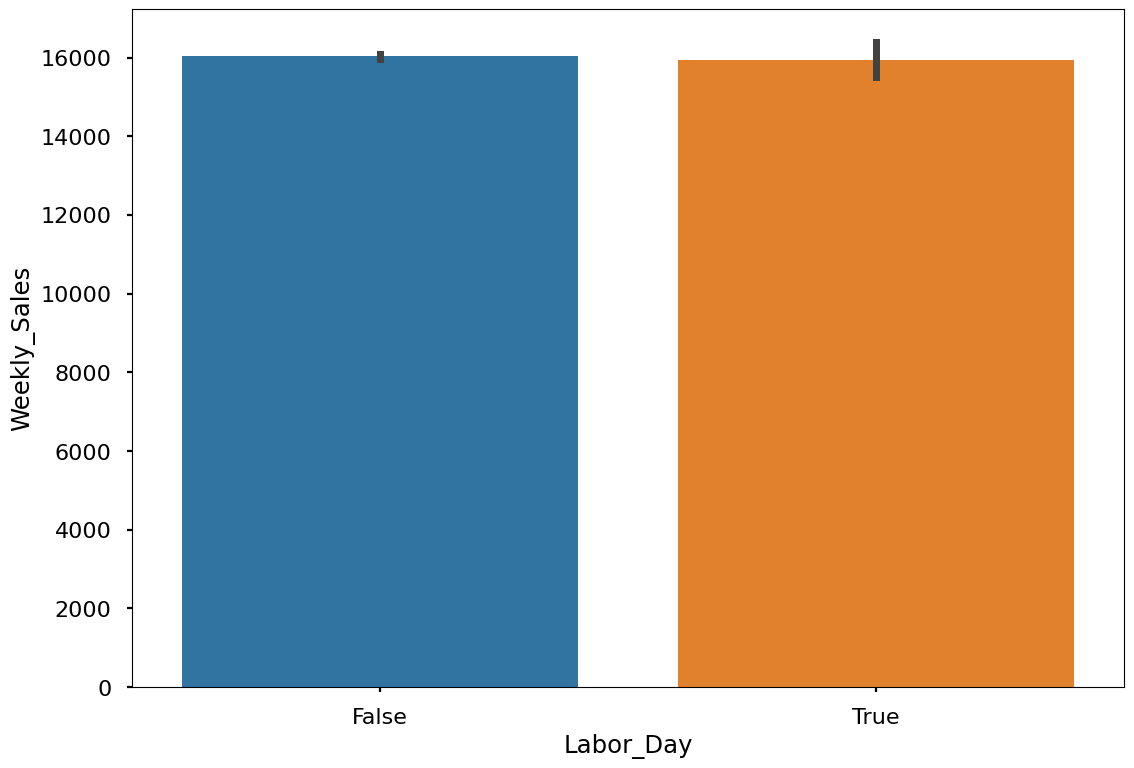

In [101]:
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=data)

In [102]:
data.groupby(['Christmas','Type'])['Weekly_Sales'].mean() 

Christmas  Type
False      A       20174.350209
           B       12301.986116
           C        9570.951973
True       A       18310.167535
           B       11488.988057
           C        8031.520607
Name: Weekly_Sales, dtype: float64

In [103]:
data.groupby(['Labor_Day','Type'])['Weekly_Sales'].mean()

Labor_Day  Type
False      A       20151.210941
           B       12294.954138
           C        9542.098293
True       A       20004.267422
           B       12084.304642
           C        9893.459258
Name: Weekly_Sales, dtype: float64

In [104]:
data.groupby(['Thanksgiving','Type'])['Weekly_Sales'].mean()

Thanksgiving  Type
False         A       20044.007801
              B       12197.717405
              C        9547.377807
True          A       27397.776346
              B       18733.973971
              C        9696.566616
Name: Weekly_Sales, dtype: float64

In [105]:
data.groupby(['Super_Bowl','Type'])['Weekly_Sales'].mean() 

Super_Bowl  Type
False       A       20138.055908
            B       12286.739293
            C        9536.110508
True        A       20612.757674
            B       12467.035506
            C       10179.271884
Name: Weekly_Sales, dtype: float64

In [106]:
data.groupby('IsHoliday')['Weekly_Sales'].mean()

IsHoliday
False    15952.816352
True     17094.300918
Name: Weekly_Sales, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_9416\2621990641.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


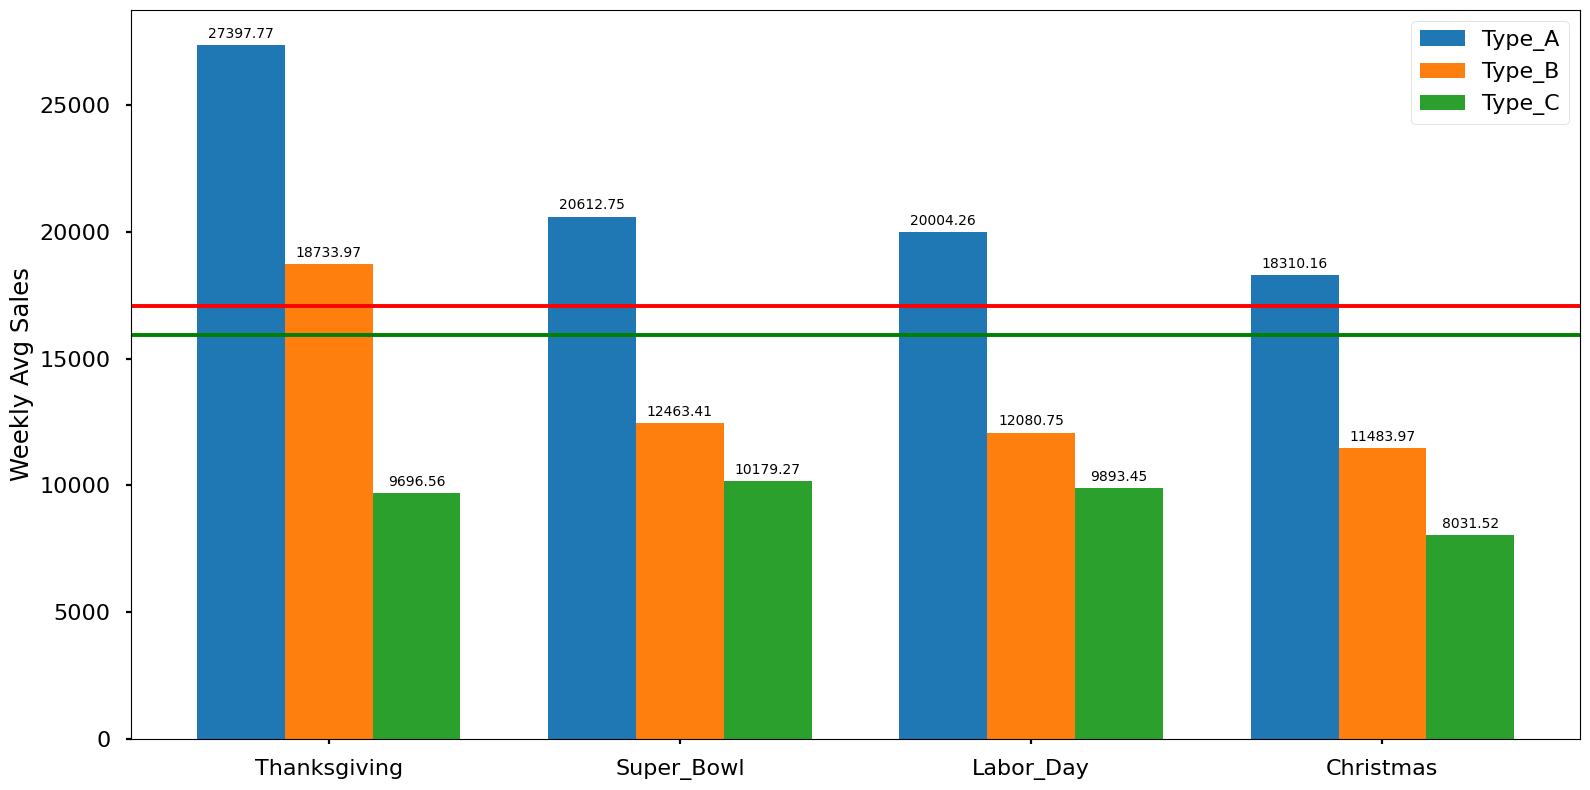

In [107]:
# Plotting avg wekkly sales according to holidays by types
plt.style.use('seaborn-poster')
labels = ['Thanksgiving', 'Super_Bowl', 'Labor_Day', 'Christmas']
A_means = [27397.77, 20612.75, 20004.26, 18310.16]
B_means = [18733.97, 12463.41, 12080.75, 11483.97]
C_means = [9696.56,10179.27,9893.45,8031.52]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width, A_means, width, label='Type_A')
rects2 = ax.bar(x , B_means, width, label='Type_B')
rects3 = ax.bar(x + width, C_means, width, label='Type_C')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Weekly Avg Sales')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.axhline(y=17094.30,color='r') # holidays avg
plt.axhline(y=15952.82,color='green') # not-holiday avg

fig.tight_layout()

plt.show()

In [108]:
data.sort_values(by='Weekly_Sales',ascending=False).head(5)

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas
90645,10,72,2010-11-26,693099.36,55.33,3.162,0.00,0.0,0.00,0.00,0.00,126.669267,9.003,True,B,126512,False,False,True,False
337053,35,72,2011-11-25,649770.18,47.88,3.492,1333.24,0.0,58563.24,20.97,6386.86,140.421786,8.745,True,B,103681,False,False,True,False
94393,10,72,2011-11-25,630999.19,60.68,3.760,174.72,329.0,141630.61,79.00,1009.98,129.836400,7.874,True,B,126512,False,False,True,False
333594,35,72,2010-11-26,627962.93,46.67,3.039,0.00,0.0,0.00,0.00,0.00,136.689571,8.763,True,B,103681,False,False,True,False
131088,14,72,2010-11-26,474330.10,46.15,3.039,0.00,0.0,0.00,0.00,0.00,182.783277,8.724,True,A,200898,False,False,True,False


In [109]:
import math
from datetime import datetime
from datetime import timedelta

data['week'] =data['Date'].dt.strftime("%W")
data['month'] =data['Date'].dt.strftime("%m")
data['year'] =data['Date'].dt.strftime("%Y")

In [110]:
data.groupby('month')['Weekly_Sales'].mean()

month
01    14182.239153
02    16048.701191
03    15464.817698
04    15696.435193
05    15845.556200
06    16397.605478
07    15905.472425
08    16113.800069
09    15147.216063
10    15279.182119
11    17534.964277
12    19425.798603
Name: Weekly_Sales, dtype: float64

In [111]:
data.groupby('year')['Weekly_Sales'].mean()

year
2010    16318.648285
2011    16007.797985
2012    15748.265005
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='month'>

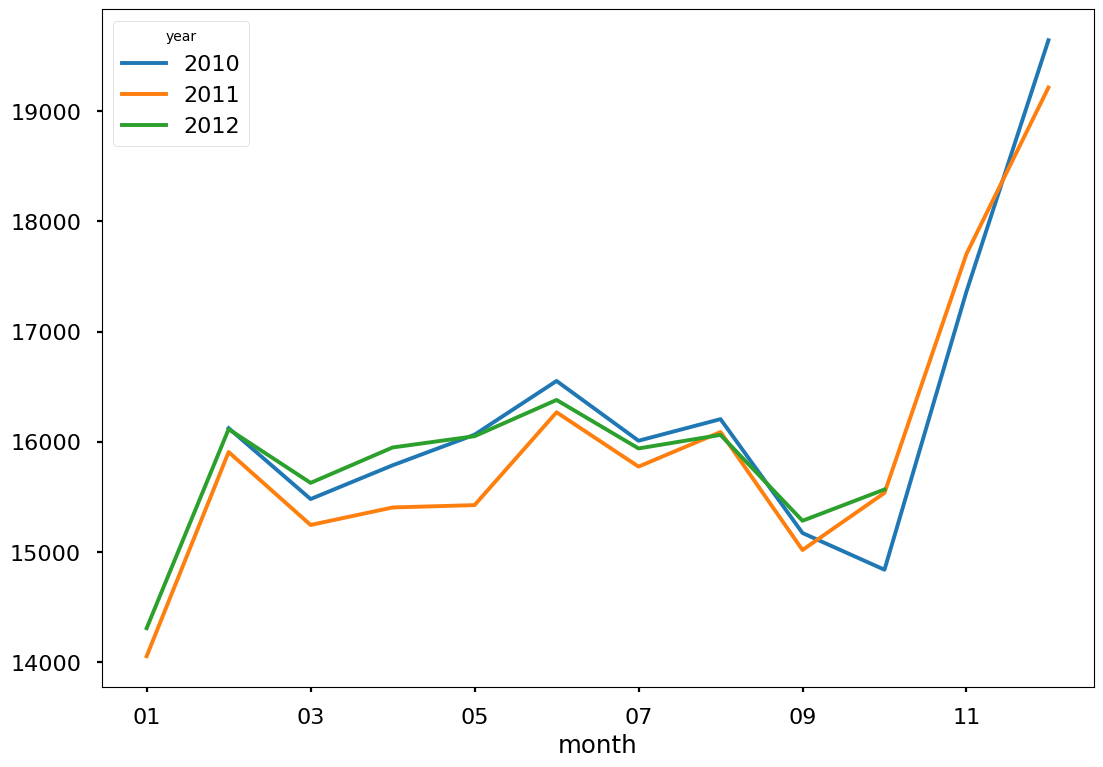

In [112]:
monthly_sales = pd.pivot_table(data, values = "Weekly_Sales", columns = "year", index = "month")
monthly_sales.plot()

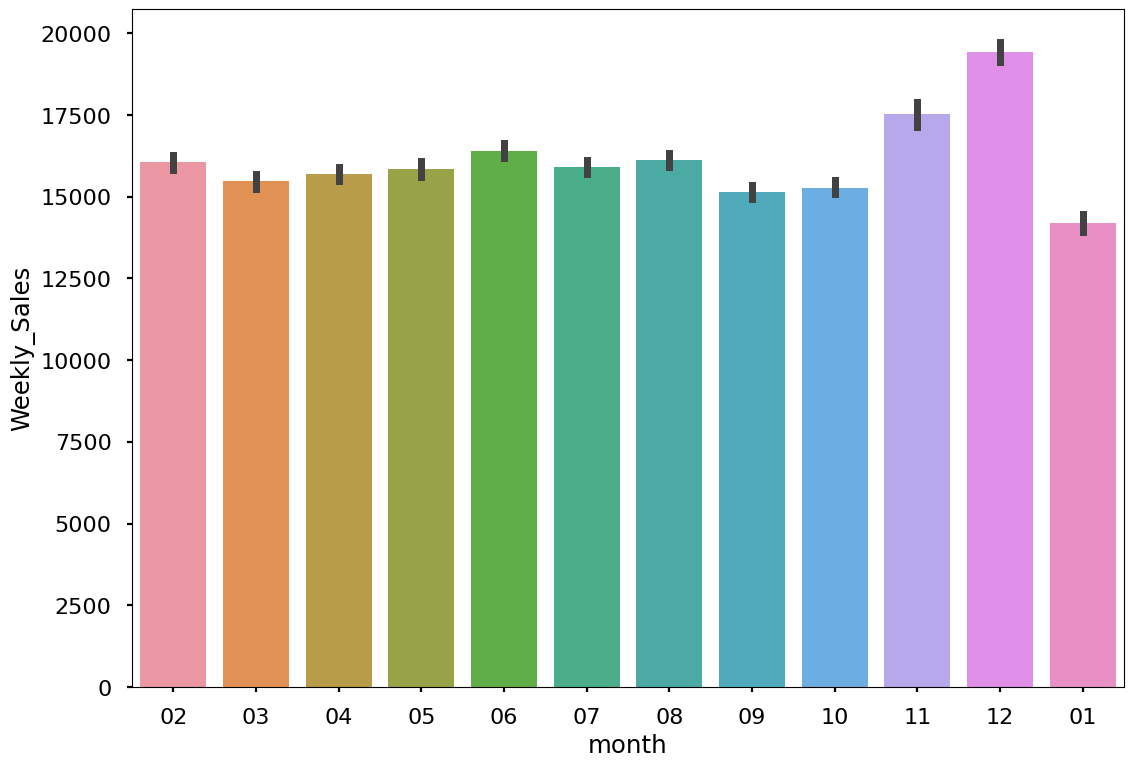

In [113]:
fig = sns.barplot(x='month', y='Weekly_Sales', data=data)

In [114]:
data.groupby('week')['Weekly_Sales'].mean().sort_values(ascending=False).head()

week
51    26454.164116
47    22269.601768
50    20478.421134
49    18731.794840
22    16856.650245
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='week'>

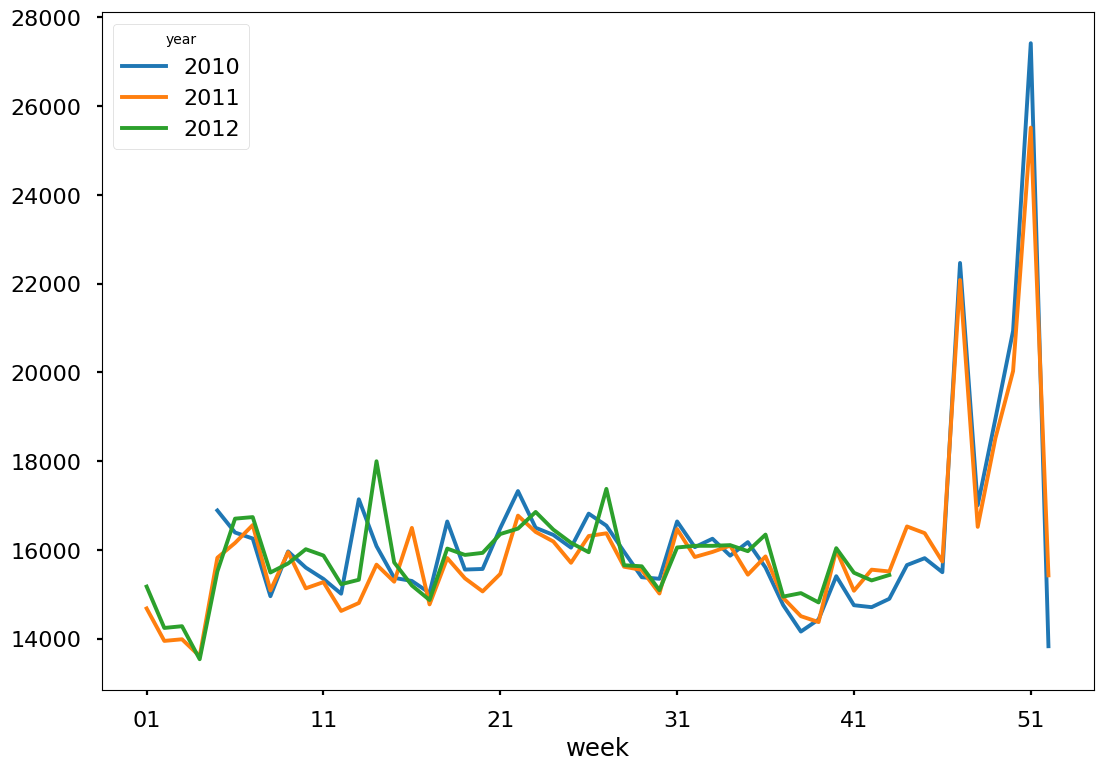

In [115]:
weekly_sales = pd.pivot_table(data, values = "Weekly_Sales", columns = "year", index = "week")
weekly_sales.plot()

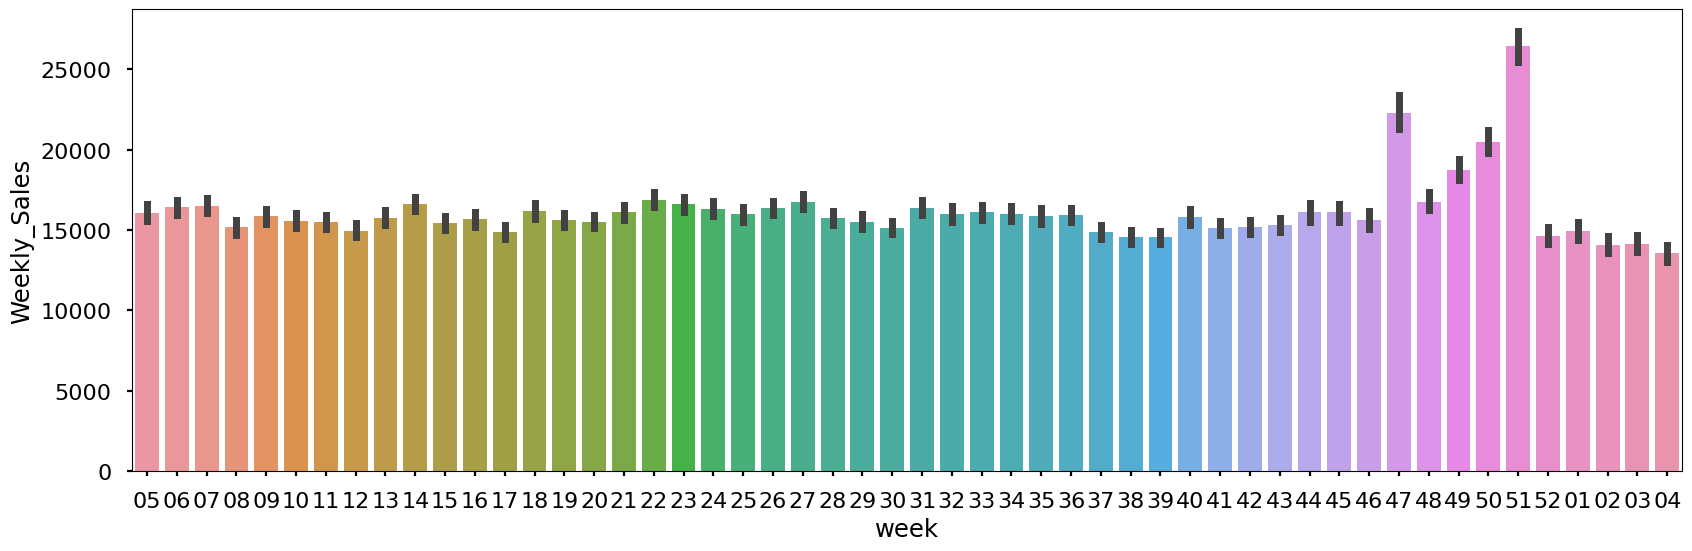

In [116]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='week', y='Weekly_Sales', data=data)

In [117]:
data.to_csv("../Data/Clean-data/explored.csv", index=False)